**link to the course playlist**\
https://www.youtube.com/watch?v=k850DNwR9xw&list=PLlb7e2G7aSpTZN_zRrbpVJUvB-pTuM_VL&ab_channel=ComputerScienceCenter

# Сортировки

## Сортировки со сравнениями

In [953]:
def test_sort(sort):
    test_examples = [[], [1, 2, 3], [3, 2, 1], [4, 5, 6, 3, 2, 1],
                     [4, 5, 6, 2, 3, 1], [1, 6, 5, 14, 61, 761, 4]]
    test_answers = [[], [1, 2, 3], [1, 2, 3], [1, 2, 3, 4, 5, 6],
                    [1, 2, 3, 4, 5, 6], [1, 4, 5, 6, 14, 61, 761]]
    for i, ex in enumerate(test_examples):
        sort(ex)
        assert test_answers[i] == ex, f'test case {i} error, answer{ex}'
    n = len(test_examples)
    return f'{n}/{n} tests passed'

In [1011]:
def random_tester_sort(sort, num_tests=100, len_arr=10):
    for test in range(num_tests):
        ex = []
        for i in range(0, len_arr):
            ex.append(random.randint(0, 100))
        res = sort(ex)
        z = ex.sort()
        assert res == ex
    return f'{num_tests}/{num_tests} tests passed'

In [1013]:
from typing import List


def choice_sort(a: List[int]) -> List[int]:
    ''' 
    '''
    n = len(a)
    for i in range(n):
        min_ = a[i]
        id_ = i
        for j in range(i + 1, n):
            if a[j] < min_:
                min_ = a[j]
                id_ = j
        a[i], a[id_] = a[id_], a[i]
    return a


test_sort(choice_sort)
random_tester_sort(choice_sort)

'100/100 tests passed'

In [1016]:
def insert_sort(a: List[int]) -> List[int]:
    ''' plus: ~ num of inversion operations
    '''
    n = len(a)
    for i in range(1, n):
        j = i
        while j > 0 and a[j - 1] > a[j]:
            a[j], a[j - 1] = a[j - 1], a[j]
            j -= 1
    return a


test_sort(insert_sort)
random_tester_sort(insert_sort)

'100/100 tests passed'

In [1017]:
def merge_sort(a: List[int], l=None, r=None) -> List[int]:
    '''
    plus: stability
    minus: ~ 2n memory
    a - int array for sort
    l - left index
    r - right index
    '''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    if r - l <= 1:
        return a
    m = (l + r) // 2
    merge_sort(a, l, m)
    merge_sort(a, m, r)
    i, j, p = l, m, 0
    t = [0] * (r - l)
    while i < m and j < r:
        if a[i] < a[j]:
            t[p] = a[i]
            i, p = i + 1, p + 1
        else:
            t[p] = a[j]
            j, p = j + 1, p + 1
    while i < m:
        t[p] = a[i]
        p, i = p + 1, i + 1
    while j < r:
        t[p] = a[j]
        p, j = p + 1, j + 1
    for i in range(r - l):
        a[l + i] = t[i]
    return a


test_sort(merge_sort)
random_tester_sort(merge_sort)

'100/100 tests passed'

In [1023]:
import random


def partition(a: List[int], l=None, r=None, id_=None):
    '''
    peek random x in arr;
    then partition arr by it;
    
    return id, which satisfies follow inequalities:
        if i<id -> arr[i]<=x; if i>id -> arr[i]>x
    '''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    assert r - l > 1
    if id_ is None:
        id_ = random.randint(l, r - 1)
    x = a[id_]
    a[l], a[id_] = a[id_], a[l]
    i, j = l + 1, r - 1
    while i <= j:
        if a[i] > x:
            a[j], a[i] = a[i], a[j]
            j -= 1
        else:
            i += 1
    a[l], a[i - 1] = a[i - 1], a[l]
    return i - 1


def quick_sort(a: List[int], l=None, r=None) -> List[int]:
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    if r - l <= 1:
        return a
    ind = partition(a, l, r)
    quick_sort(a, l, ind)
    quick_sort(a, ind, r)
    return a


test_sort(quick_sort)
random_tester_sort(quick_sort)

'100/100 tests passed'

In [860]:
def test_kth(kth):
    test_examples=[[1,2,3],[5,4,3,2,1],[-3,-2,-6,3,1,6,1000,-3,-7,-12,100000],[5,4,3,1,2,3],[3]*21+[4]*30,[3]*21+[4]*30]
    test_queries = [2,1,10,6,20,45]
    test_answers = [2,1,1000,5,3,4]
    for i,(ex, k, ans) in enumerate(zip(test_examples,test_queries,test_answers)):
        res = kth(ex,k)
        assert res==ans, f'test case error {i}, res {res} but answer {ans}'
    n = len(test_examples)
    return f'{n}/{n} tests passed'
        

In [1020]:
def random_tester_kth(kth,num_tests=100,len_arr=10):
    for test in range(num_tests):
        ex = []
        for i in range(0,len_arr):
            ex.append(random.randint(0,100))
        k = random.randint(1,len_arr)
        res = determ_kth(ex,k)
        ex.sort()
        ans = ex[k-1]
        assert res==ans
    return f'{num_tests}/{num_tests} tests passed'

In [1021]:
def random_kth(a: List[int],k,l=None,r=None):
    ''' return kth statistics from arr
    assumption, that arr is not empty and parameter k is corrected'''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    assert r!=l, f'r={r},l={l}'
    if r-l==1:
        return a[l]
    id_ = partition(a,l,r)
    if id_==k-1:
        return a[id_]
    if id_>k-1:
        return random_kth(a,k,l,id_)
    else:
        return random_kth(a,k,id_,r)
test_kth(random_kth)
random_tester_kth(random_kth)

'100/100 tests passed'

In [1022]:
def partition_5(a = List[int], l=None,r=None,id_=None):
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    n = (r-l)//5
    medians = []
    for i in range(n):
        block = a[l+5*i:l+5*i+5]
        block.sort()
        medians.append(block[2])
    val = determ_kth(medians,n//2)
    # calculate id median of medians
    for i in range(l,r):
        if a[i]==val:
            id_=i
    # partition for this id
    x = a[id_]
    a[l],a[id_] = a[id_],a[l]
    i,j = l+1, r-1
    while i<=j:
        if a[i]>x:
            a[j],a[i]=a[i],a[j]
            j-=1
        else:
            i+=1
    a[l],a[i-1]=a[i-1],a[l]    
    return i-1

def determ_kth(a: List[int],k,l=None,r=None):
    ''' return kth statistics from arr
    assumption, that arr is not empty and parameter k is corrected'''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    if r-l==1:
        return a[l]
    if r-l<=50:
        t = a[l:r]
        t.sort()
        return t[k-l-1]
    id_ = partition_5(a,l,r)
    if id_==k-1:
        return a[id_]
    if id_>k-1:
        return determ_kth(a,k,l,id_)
    else:
        return determ_kth(a,k,id_,r)
test_kth(determ_kth)
random_tester_kth(determ_kth)

'100/100 tests passed'

## Сортировки без сравнений


$counting\_sort$\
Работает в ситуации, когда все элменты массива $a_i$  ограничены каким-то числом $C$).\
Считая, что аллокация памяти работает за $\mathcal{O}(1)$, алгоритм работает за $\mathcal{O}(C+n)$ памяти и времени.
Важно, что он линеен по количеству элементов, но размер входа все-таки $\mathcal{O}(n\log C)$.


In [956]:
def countsort(a:List[int],C=1000)->List[int]:
    '''
    0<=arr[i]<C
    '''
    n = len(a)
    temp = [0]*C
    for el in a:
        temp[el]+=1
    res = []
    j = 0
    for i, el in enumerate(temp):
        while el>0:
            a[j]=i
            j+=1
            el-=1
    return a
test_sort(countsort)            

Улучшение этой идеи ($digitsort/radixsort$) - сортировка кортежей чисел, по факту это запись в $C$-ичной системе исчисления.

Запускаем $\log_C \max_i |a[i]|$ сортировок подсчетом по конкретной цифре в записи, начиная с самой последней.

Из-за того, что она устойчива, в конце мы получим лексикографически отсортированные числа. По времени это $\mathcal{O}\left((n+C)\cdot\log_C X\right)$, где $X = \max_i |a_i|$.

In [1012]:
def counting_sort(a:List[int],deg:int)->List[int]:
    n = len(a)
    count, output = [0]*10, [0]*n
    for i in range(n):
        tail = 10**deg
        val = a[i]//tail
        count[val%10]+=1
    for i in range(1,10):
        count[i]+=count[i-1]
    i = n-1
    while i>=0:
        tail = 10**deg
        val = a[i]//tail
        index = val%10
        output[count[index]-1]=a[i]
        count[index]-=1
        i-=1
    for i in range(n):
        a[i]=output[i]
    return 

def radix_sort(a: List[int])->List[int]:
    if a == []:
        return a
    max_ = max(a)
    
    exp = 0
    while (10**exp)<max_:
        counting_sort(a,exp)
        exp+=1
    return a
random_tester_sort(radix_sort)

'100/100 tests passed'

# BinSearch

In [1035]:
def bin_search(a: List[int], target: int)->int:
    l,r = -1, len(a)
    while r-l>1:
        m = r+l//2
        if a[m] > target:
            r = m
        else:
            l = m
    if l ==-1 or a[l]!=target:
        return -1
    else:
        return l

In [1039]:
bin_search([],1)

-1

# Динамическое программирование


* задача о кузнечике
* задача о наибольшей возрастающей подстроке $\mathcal{O}(n^2)$
* бинарная задача о рюкзаке, решаемая за $\mathcal{O}(n \cdot W)$, через состояния $b_{i,w}$ - это когда можно предметы $1,\dots,i$ и суммарный вес ровно $w$
* задача о расстановке скобок в произведении матриц. красивое решение через рекурсию с запоминанием $get\_F!$
* поиск независимого множества максимального веса в дереве. решается через подвешивания + dfs( ), важно построить списки смежности
* код Хаффмана: две редчайшие буквы объединияем в один лист с новой частотой, строя при этом дерево $\mathcal{O}(n \log n)$ с приоритетной очередью
* задача про возможное выполнение работ на одном станке (единичные затраты!): выполняем все доступные, у которых близко дедлайн
* задача про замощение полуинтервалами: сортировка по концам работ с отбрасыванием
* задача с коробками: интересная плотность для жадного алгоритма, появилась вполне естественно из условия допустимости $\rho_i = s_i + M_i$

In [1045]:
# псевдокод для образования списка смежностей на вершинах 1...n
#edges = [[] for i in range(n)]
#for (u,v) in E:
#    edges[u].append(v)
#    edges[v].append(u)    

# Структуры данных

## Базовые структуры

Pointer machine model:
* **stack** (pop, push, size, etc...), реализация через указатель top 
* **queue** (pop, push, front, back), реализация через указатели front, top, next
* **deque** (pop B, pop F, push B, push F, front, back), реализация через указатели в обе стороны

RAM model:

* **array** / **vector** / **list**: выделяем подряд идущие биты, при нехватке увеличиваем размер в 2 раза, амортизационная оценка $\mathcal{O}(1)$


In [124]:
class Node():
    def __init__(self, val = None, i = None, j = None):
        self.value = val
        self.next = i
        self.prev = j
    def get_next(self):
        return self.next
    def get_value(self):
        return self.value
    def get_prev(self):
        return self.prev

In [125]:
class stack():
    def __init__(self):
        self.top = None

    def get_top(self):
        if self.top is not None:
            return self.top.get_value()
        return []

    def pop(self):
        if self.top is not None:
            val = self.top.get_value()
            self.top = self.top.get_next()
            return val
        return []

    def push(self, val):
        x = Node(val)
        x.next = self.top
        self.top = x

    def get_all(self):
        res = []
        temp = self.top
        while temp is not None:
            res.append(temp.get_value())
            temp = temp.get_next()
        print(res)

In [126]:
class queue():
    def __init__(self):
        self.front = self.back = None

    def push(self, val):
        node = Node(val)
        if self.back is not None:
            self.back.next = node
            self.back = node
        else:
            self.front = node
            self.back = node

    def pop(self):
        if self.front is not None:
            val = self.front.get_value()
            self.front = self.front.get_next()
            return val
        return []

    def get_front(self):
        if self.front is not None:
            return self.front.get_value()
        else:
            return []

    def get_back(self):
        return self.back.get_value()

    def get_all(self):
        temp = self.front
        res = []
        while temp is not None:
            res.append(temp.get_value())
            temp = temp.get_next()
        return res

In [157]:
class deque():
    def __init__(self):
        self.front = self.back = None

    def push_back(self, val):
        node = Node(val)
        if self.back is not None:
            self.back.next = node
            node.prev = self.back
            self.back = node
        else:
            self.back = node
            self.front = node

    def push_front(self, val):
        node = Node(val)
        if self.front is not None:
            self.front.prev = node
            node.next = self.front
            self.front = node
        else:
            self.front = node
            self.back = node

    def get_all_front(self):
        res = []
        temp = self.front
        while temp is not None:
            res.append(temp.get_value())
            temp = temp.get_next()
        return res

    def get_all_back(self):
        res = []
        temp = self.back
        while temp is not None:
            res.append(temp.get_value())
            temp = temp.get_prev()
        return res

    def pop_back(self):
        if self.back is None:
            return []
        val = self.back.get_value()
        self.back = self.back.get_prev()
        self.back.next = None
        return val

    def pop_front(self):
        if self.front is None:
            return []
        val = self.front.get_value()
        self.front = self.front.get_next()
        self.front.prev = None
        return val

## Приоритетная очередь

**Interface:**
* insert
* extract_min

Применяется для упорядоченного множества, чтобы поиск был однозначным можно использовать insert_id\
(его можно поддерживать с помощью двух массивов).


**Двоичная куча (with delete, decrease_key)** \

Основные операции выполняются с помощью sift-процедур. 
Для работы с внешней памятью можно настраивать баланс siftUp vs siftDown k-ичными аналогами.
Построение на месте за $\mathcal{O}(n)$, добавление и удаление за $\mathcal{O}(\log n)$.

In [195]:
#import heapq
#array = list()
#heapq.heapify(array)
#heapq.heappush(array,item)
#hepq.heappop(array)

**Левосторонняя куча (with merge)**

Поддерживается инвариант, что node.L.d>=node.R.d (кратчайший путь до отсутствующего ребенка - идти вправо)\
Все операции выражаются через merge(heap_a, heap_b), а она рекурсивна и работает за $\mathcal{O}(\log ab)$

In [198]:
# class Node():
#    self.val
#    self.L
#    self.R
#    self.d

In [205]:
# merge(heap_a,heap_b):
#    if heap_a.extract_min > heap_b.extract_min:
#        heap_a, heap_b = heap_b,heap_a
#    root = heap_a.pop
#    root.L=heap_a.L
#    root.R=merge(heap_a.R,heap_b)
#    if root.R.d>root.L.d:
#        root.R, root.L = root.L, root.R

## Система непересекающихся множеств


**Interface:**
* Уметь быстро объединять какие-то классы множеств (union)
* Уметь быстро узнавать, к какому классу относится объект (find)

**Union Find Set / DES**

* На списках (работает в среднем за $\mathcal{O}(\log n)$ с рангами). Там у нас есть массив цветов и список с элементами класса. Больше чем $\log n$ перекладываний в другой класс быть не может.
* На деревьях (ранговая и ссылочная эвристики) можно считать за $\mathcal{O}(1)^*$

In [ ]:
class UnionFind():
    def __init__(self, size=0):
        self.roots = list(range(size))
        self.ranks = [1] * size

    def find(self, id):
        if id == self.roots[id]:
            return id
        self.roots[id] = self.find(self.roots[id])
        return self.roots[id]

    def union(self, id1, id2):
        root1 = self.find(id1)
        root2 = self.find(id2)
        if root1 != root2:
            if self.ranks[root1] > self.ranks[root2]:
                self.roots[root2] = root1
                self.ranks[root1] += self.ranks[root2]
            else:
                self.roots[root1] = root2
                self.ranks[root2] += self.ranks[root1]

## Binary Search Tree

**Interface:**
* insert( ): надо идти в то место, где бы мы его искали
* delete( ) : Если 0 или 1 - то просто удаляем вершину и ставим ребенка на её место, если же детей двое, то ищем минимальную node в правом поддереве и заменяем удаляемую вершину на нее 

**Advanced Interface**:
* get_next( ), get_prev( )
* findkth( ) 
* find_biggest( ), find_smallest( )

**Structure:**
* Поддерживается инвариант, что значения в левом поддереве меньше значения родителей, а в правом - больше


In [206]:
# delete(root, key):
#     if root is None:
#         return None
#     if root.val > key:
#         root = root.L
#     elif root.val < key:
#         root=root.R
#     else:
#         if root.R is None:
#             return root.L
#         else:
#             m = get_min(root.R)
#             delete(root.R, m.val)
#             m.L = root.L
#             m.R = root.R
#             return m
        

In [207]:
# def get_next(node):
#     if node.R is not None:
#         return get_min(node.R)
#     p = node.prev
#     while p is not None and p.R == node:
#         node = p
#         p = p.prev
#     return p

In [ ]:
# Надо хранить ещё размер поддеревьев Node.size

def findkth(root, k):
    assert k<root.size, 'Error, k more then the size of BST'
    leftsize = 0 if root.L is None else root.L.size
    if leftsize>=k:
        return findkth(root.L,k)

    elif leftsize==k-1:
        return root.val
    else:
        return findkth(root.R, k - leftsize - 1)

Но все это работает за $\mathcal{O}(n)$, если не контролировать высоту дерева.\


**AVL Tree**
* Будем требовать, чтобы у любой вершины дерева высоты поддеревьев отличались не больше чем на один, тогда высота будет $\mathcal{O}(\log n)$

In [32]:
class Node:
    def __init__(self, key):
        self.key = key
        self.parent = None
        self.rightChild = None
        self.leftChild = None         
        self.height = 0
        self.size = 1
    def __str__(self):
        return str(self.key)#+'('+str(self.height)+')'
    def is_leaf(self):
        return self.height == 0
    def max_children_height(self):
        if self.leftChild and self.rightChild:
            return max(self.leftChild.height,self.rightChild.height)
        elif self.leftChild:
            return self.leftChild.height
        elif self.rightChild:
            return self.rightChild.height
        else:
            return -1

    def balance(self):
        return (self.leftChild.height if self.leftChild else -1) -\
               (self.rightChild.height if self.rightChild else -1)            

In [33]:
class AVLTree():
    '''
        __str__
            Args:
            Return a cute trees visualisation 
            
            Examples::   
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> print(tree)
        >>>        4       
        >>>       / \        
        >>>      /   \       
        >>>     /     \      
        >>>    2       5   
        >>>   / \       \      
        >>>  1   3       6 

        height
            Args:
            Return AVLTree's height
            
            Examples::
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> height = tree.height()
        >>> print(height)
        >>> 2
        
        find
            Args: 
                key, node
            Return Node in node's subtree with this key
            
            Examples::            
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.find(4)
        >>> <__main__.Node at 0x7f89d0ae92e0>
        >>> print(tree.find(4))
        >>> 4
        >>> print(tree.find(7)) # return None
        >>> None        
        
        
        find_biggest
            Args:
            Return biggest key in AVLTree
            
            Examples:: 
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.find_biggest()
        >>> 6
        
        find_smallest
            Args:
            Return smallest key in AVLTree
            
            Examples:: 
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.find_biggest()
        >>> 1        
        
        as_list
            Args:
                rype
            return AVLTrees keys in order depend on type:
                0 == preorder 
                1 == inorder
                2 == postorder
                
            Examples:: 
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.as_list(0)
        >>> [4, 2, 1, 3, 5, 6]
        >>> tree.as_list(1)
        >>> [1, 2, 3, 4, 5, 6]    
        >>> tree.as_list(2)        
        >>> [1, 3, 2, 6, 5, 4]
        
        
        remove(key)
            Args: key
            return AVLTrees root without node, which val is equal key

            Examples:: 
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.remove(3)
        >>> print(tree)   
        >>>        4       
        >>>       / \        
        >>>      /   \       
        >>>     /     \      
        >>>    2       5   
        >>>   /         \      
        >>>  1           6         
        
        findkth
            Args: k, node
            return kth key in node's subtree 

            Examples:: 
        >>> tree = AVLTree([1,2,3,4,5,6])
        >>> tree.findkth(2) 
        >>> 2
        >>> tree.findkth(2,tree.rootNode.rightChild)
        >>> 6       
    '''
    
    def __init__(self, h=[]):
        self.rootNode = None
        self.elements_count = 0
        self.rebalance_count = 0
        for el in h:
            self.insert(el)

    def height(self):
        if self.rootNode:
            return self.rootNode.height
        else:
            -1
            
    def find_in_subtree(self, key, node):
        if node is None:
            return None  # key not found
        if key < node.key:
            return self.find_in_subtree(key,node.leftChild)
        elif key > node.key:
            return self.find_in_subtree(key,node.rightChild)
        else:  # key is equal to node key
            return node
        
    def find(self, key, node=None):
        if node is None:
            node=self.rootNode
        return self.find_in_subtree(key,node)
            
    def recompute_heights(self, startNode):
        changed = True
        node = startNode
        while node and changed:
            old_height = node.height
            node.height = (node.max_children_height() + 1 if
                           (node.rightChild or node.leftChild) else 0)
            changed = node.height != old_height
            node = node.parent

    def find_biggest(self, start_node):
        node = start_node
        while node.rightChild:
            node = node.rightChild
        return node

    def find_smallest(self, start_node):
        node = start_node
        while node.leftChild:
            node = node.leftChild
        return node

    def as_list(self, type=1):
        if not self.rootNode:
            return []
        assert type in [0,1,2], 'wrong type value'
            
        if type == 0:
            return self.preorder(self.rootNode)
        elif type == 1:
            return self.inorder(self.rootNode)
        elif type == 2:
            return self.postorder(self.rootNode)

    def preorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        retlst += [node.key]
        if node.leftChild:
            retlst = self.preorder(node.leftChild, retlst)
        if node.rightChild:
            retlst = self.preorder(node.rightChild, retlst)
        return retlst

    def inorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        if node.leftChild:
            retlst = self.inorder(node.leftChild, retlst)
        retlst += [node.key]
        if node.rightChild:
            retlst = self.inorder(node.rightChild, retlst)
        return retlst

    def postorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        if node.leftChild:
            retlst = self.postorder(node.leftChild, retlst)
        if node.rightChild:
            retlst = self.postorder(node.rightChild, retlst)
        retlst += [node.key]
        return retlst

    def add_as_child(self, parent_node, child_node):
        node_to_rebalance = None
        parent_node.size+=1        
        if child_node.key < parent_node.key:

            if not parent_node.leftChild:
                parent_node.leftChild = child_node
                child_node.parent = parent_node
                if parent_node.height == 0: # in this case trees height could change
                    node = parent_node
                    while node:
                        node.height = node.max_children_height() + 1
                        if not node.balance() in [-1, 0, 1]:
                            node_to_rebalance = node
                            break 
                        node = node.parent
            else:
                self.add_as_child(parent_node.leftChild, child_node)
        else:
            if not parent_node.rightChild:
                parent_node.rightChild = child_node
                child_node.parent = parent_node
                if parent_node.height == 0: # in this case trees height could change
                    node = parent_node
                    while node:
                        node.height = node.max_children_height() + 1
                        if not node.balance() in [-1, 0, 1]:
                            node_to_rebalance = node
                            break 
                        node = node.parent
            else:
                self.add_as_child(parent_node.rightChild, child_node)

        if node_to_rebalance:
            self.rebalance(node_to_rebalance)

    def insert(self, key):
        new_node = Node(key)
        if not self.rootNode:
            self.rootNode = new_node
            assert self.elements_count==0,'Wrong elements_count'
            self.elements_count += 1
        else:
            if not self.find(key):
                self.elements_count += 1
                self.add_as_child(self.rootNode, new_node)
        return self

    def remove_branch(self, node):
        parent = node.parent
        if (parent):
            if parent.leftChild == node:
                parent.leftChild = node.rightChild or node.leftChild
            else:
                parent.rightChild = node.rightChild or node.leftChild
            if node.leftChild:
                node.leftChild.parent = parent
            else:
                node.rightChild.parent = parent
            self.recompute_heights(parent)
        del node
       
        # rebalance
        node = parent
        while (node):
            self.resize(node)
            if not node.balance() in [-1, 0, 1]:
                self.rebalance(node)
                

            node = node.parent

    def remove_leaf(self, node):
        parent = node.parent
        if (parent):
            if parent.leftChild == node:
                parent.leftChild = None
            else:
                parent.rightChild = None
            self.recompute_heights(parent)
        else:
            self.rootNode = None            
        del node
        
        # rebalance        
        node = parent
        while (node):
            self.resize(node)            
            if not node.balance() in [-1, 0, 1]:
                self.rebalance(node)
            node = node.parent

    def remove(self, key):
        node = self.find(key)

        if not node is None:
            self.elements_count -= 1
            if node.is_leaf():
                self.remove_leaf(node)
            elif (bool(node.leftChild)) ^ (bool(node.rightChild)):
                self.remove_branch(node)
            else:
                self.swap_with_successor_and_remove(node)

    def swap_with_successor_and_remove(self, node):
        successor = self.find_smallest(node.rightChild)
        self.swap_nodes(node, successor)
        if node.height == 0:
            self.remove_leaf(node)
        else:
            self.remove_branch(node)

    def swap_nodes(self, node1, node2):
        parent1 = node1.parent
        leftChild1 = node1.leftChild
        rightChild1 = node1.rightChild
        parent2 = node2.parent
        leftChild2 = node2.leftChild
        rightChild2 = node2.rightChild

        # swap heights
        tmp = node1.height
        node1.height = node2.height
        node2.height = tmp
        
        #swap sizes
        
        tmp = node1.size
        node1.size=node2.size
        node2.size=tmp

        if parent1:
            if parent1.leftChild == node1:
                parent1.leftChild = node2
            else:
                parent1.rightChild = node2
            node2.parent = parent1
        else:
            self.rootNode = node2
            node2.parent = None

        node2.leftChild = leftChild1
        leftChild1.parent = node2
        
        node1.leftChild = leftChild2
        node1.rightChild = rightChild2
        if rightChild2:
            rightChild2.parent = node1
            
            
        if not (parent2 == node1):
            node2.rightChild = rightChild1
            rightChild1.parent = node2

            parent2.leftChild = node1
            node1.parent = parent2
        else:
            node2.rightChild = node1
            node1.parent = node2

    def resize(self, node):
        node.size = 1
        if node.rightChild:
            node.size+=node.rightChild.size
        if node.leftChild:
            node.size+=node.leftChild.size
        
    def rebalance(self, node_to_rebalance):
        self.rebalance_count += 1
        A = node_to_rebalance
        F = A.parent  
        if node_to_rebalance.balance() == -2:
            if node_to_rebalance.rightChild.balance() <= 0:
                """Rebalance, ase RRC """
                B = A.rightChild
                C = B.rightChild
                A.rightChild = B.leftChild
                if A.rightChild:
                    A.rightChild.parent = A
                B.leftChild = A
                A.parent = B
                if F is None:
                    self.rootNode = B
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = B
                    else:
                        F.leftChild = B
                    B.parent = F
                self.recompute_heights(A)                                                                                        
                self.resize(A)
                self.resize(B)
                self.resize(C)
            else:
                """Rebalance, case RLC """
                B = A.rightChild
                C = B.leftChild
                B.leftChild = C.rightChild 
                if B.leftChild:
                    B.leftChild.parent = B
                A.rightChild = C.leftChild
                if A.rightChild:
                    A.rightChild.parent = A
                C.rightChild = B
                B.parent = C
                C.leftChild = A
                A.parent = C
                if F is None:
                    self.rootNode = C
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = C
                    else:
                        F.leftChild = C
                    C.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B)
                self.resize(A)
                self.resize(B)
                self.resize(C)                
                
        else:
            assert (node_to_rebalance.balance() == +2)
            if node_to_rebalance.leftChild.balance() >= 0:
                B = A.leftChild
                C = B.leftChild
                """Rebalance, case LLC """
                A.leftChild = B.rightChild
                if (A.leftChild):
                    A.leftChild.parent = A
                B.rightChild = A
                A.parent = B
                if F is None:
                    self.rootNode = B
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = B
                    else:
                        F.leftChild = B
                    B.parent = F
                self.recompute_heights(A)
                self.resize(A)
                self.resize(C)
                self.resize(B)                
                
            else:
                B = A.leftChild
                C = B.rightChild
                """Rebalance, case LRC """
                A.leftChild = C.rightChild
                if A.leftChild:
                    A.leftChild.parent = A
                B.rightChild = C.leftChild
                if B.rightChild:
                    B.rightChild.parent = B
                C.leftChild = B
                B.parent = C
                C.rightChild = A
                A.parent = C
                if F is None:
                    self.rootNode = C
                    self.rootNode.parent = None
                else:
                    if (F.rightChild == A):
                        F.rightChild = C
                    else:
                        F.leftChild = C
                    C.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B)
                self.resize(A)
                self.resize(B)
                self.resize(C)                
                
    def findkth(self, k, root=None):
        if root is None:
            root=self.rootNode
        assert k<=root.size, 'Error, k more then the size of BST'
        leftsize = 0 if root.leftChild is None else root.leftChild.size
        if leftsize>=k:
            return self.findkth(k,root.leftChild)

        elif leftsize==k-1:
            return root.key
        else:
            return self.findkth(k - leftsize - 1, root.rightChild)    

    def __str__(self, start_node=None):
        if start_node == None:
            start_node = self.rootNode
        space_symbol = r" "
        spaces_count = 4 * 2**(self.rootNode.height)
        out_string = r""
        initial_spaces_string = space_symbol * spaces_count + "\n"
        if not start_node:
            return "Tree is empty"
        height = 2**(self.rootNode.height)
        level = [start_node]

        while (len([i for i in level if (not i is None)]) > 0):
            level_string = initial_spaces_string
            for i in range(len(level)):
                j = int((2 * i + 1) * spaces_count / (2 * len(level)))
                level_string = level_string[:j] + (str(
                    level[i]) if level[i] else space_symbol) + level_string[j +
                                                                            1:]
            out_string += level_string
            
            # create next level
            level_next = []
            for i in level:
                level_next += ([i.leftChild, i.rightChild]
                               if i else [None, None])
            # add connection to the next nodes    
            for w in range(height-1):
                level_string = initial_spaces_string
                for i in range(len(level)):
                    if not level[i] is None:
                        shift = spaces_count//(2*len(level))
                        j = (2 * i + 1) * shift
                        level_string = level_string[:j - w - 1] + (
                            '/' if level[i].leftChild else
                            space_symbol) + level_string[j - w:]
                        level_string = level_string[:j + w + 1] + (
                            '\\' if level[i].rightChild else
                            space_symbol) + level_string[j + w:]
                out_string += level_string
            height = height // 2
            level = level_next

        return out_string        

In [3]:
import random, math
def random_list_generator(len):
    res = []
    for i in range(len):
        x = random.randint(1, len)
        if x not in res:
            res.append(x)
    return res

In [4]:
def random_data_generator(len):
    for i in range(len):
        yield random.randint(1, len)

In [5]:
def testkth(l=10000, p = 1000, q =10000):
    lst = random_list_generator(l)
    c = AVLTree(lst)
    lst.sort()
    # Let's test kth after some appends
    for i in range(1,len(lst)+1):
        assert c.findkth(i)==lst[i-1], f'wrong {i}-th answer!'
    
    # Let's do some removes
    for k in range(p):
        x = random.randint(1,q)
        if not x in lst:
            continue
        else:
            lst.remove(x)
            c.remove(x)  
            
    # Let's test kth after some removes
    lst.sort()
    for i in range(1,len(lst)+1):
        assert c.findkth(i)==lst[i-1], f'wrong {i}-th answer!' 
testkth()

In [6]:
def testsize(l=1000000):
    tree = AVLTree()
    for val in random_data_generator(l):
        tree.insert(val)
    assert (tree.height() < 1.44 * math.log(l+2, 2) - 1)
    return tree.elements_count, tree.height()
testsize()    

(632835, 22)

**Red-black Tree**
* До любого листа одинаковое количество черных нод
* Две подряд красные ноды не встречаются 

Можно показать, что высота будет тоже логарифмична. И не надо хранить полностью высоту дерева, важен только цвет

**B-Tree**
* Фиксируется параметр $m\geq2$, больше которого детей быть не может
* У любой внутренней вершины хотя бы $\lceil \frac{m}{2}\rceil$ детей
* Все листья на одной глубине
* Количество детей на 1 больше, чем количество ключей внутри ноды

Это позволяет оптимизировать количество запросов к внешней памяти, если ключи хранятся там. Параметр m определяет так называемую ширину дерева. 
Частный случай: 2-3 Дерево - это  2-дерево

**Splay-Tree**
* Нет какой-то особенной структуры, каждый раз самая глубокая посещенная вершина становится корнем (через zipzag, zigzig, zig)
* Оценивается с помощью метода потенциала амортизационная сложность порядка $\log(n)$, **в том числе при merge**. Потенциал - это сумма по вершинам логарифмов от размера их поддеревьев.

**Декартово дерево/ Treap (tree + heap)/ Дуча (дерево + куча)**
* Идея структуры в том, что поддерживается инвариант: приоритет родителя больше приоритета детей.
* Анализ сложности (мат.ожидание высоты) как и в quick_sort'e: его сложность - это сумма высот всех вершин, при этом ключ равняется значению элемента в массиве, а приоритет - это номер выбора для разбиения. Получается, что сумма всех высот -  $\mathcal{O}(n\log n)$, значит, средняя высота порядка $\log n$. Это всё при условии, что **приоритеты равновероятны**
* Можно даже доказать, что мат.ожидание максимальной высоты тоже порядка $\log n$.
* Также можно реализовать **merge** (как всегда, при условии, что ключи одного дерева больше ключей другого).
* По аналогии с quick_sort можно ввести операцию split(key) разделения на поддеревья больше/меньше ключа

In [39]:
# def split(root: Node, key: int):
#     if root is None:
#         return None, None
#     if root.key < key:
#         tree1, tree2 = split(root.R, key)
#         root.R = tree1
#         return root, tree2
#     elif root.key > key:
#         tree1,tree2 = split(root.L, key)
#         root.L = tree2
#         return tree1, root
#     else:
#         return root.L, root.R

Пусть нам даны пары $(x_i,y_i)$, где $x$ - ключ, $y$ - приоритет. Также предположим, что пары отсортированы по $x$.
Тогда можно **построить treap за $\mathcal{O}(n)$** следующим образом:
(поддерживаем инвариант, что текущая вершина - самая правая в дереве)
* на шаге k+1 у нас в самом правом узле пара $(x_k,y_k)$
* пытаемся сделать $(x_{k+1},y_{k+1})$ его правым сыном 
* если приоритеты не соблюдены, то идем по родителям, пока приоритеты не соблюдены
* делаем у найденного родителя правым сыном $(x_{k+1},y_{k+1})$, а его предыдущего правого сына делаем левым потомком $k+1$-го

Заметим, т.к. мы каждый раз стартуем сразу с самой правой вершины, любая нода посещается не более двух раз (при добавлении и при перекидывании в чьё-то левое поддерево).

# RMQ (range min queue)

Дан массив чисел. Требуется сделать предобработку таким образом, чтобы достичь баланса между временем на препроцессинг и ответами на  многочисленные запросы типа: "найди минимум на подотрезке $[a_L, a_R]$".

Возможные решения:
* наивный метод - не делать препроцессинг и отвечать на $\mathcal{O}(n)$
* lookup table метод - подготовить сразу все ответы. Это $\mathcal{O}(n^2)$ на препроцессинг и $\mathcal{O}(1)$ на ответ
* lookup sparse table метод - подготовить ответы на подотрезках $f(i,k): = min [a_i, a_{i+2^k}]$. Также подготовить значения $k$ для всех разниц $R-L+1$ (логарифм вычислять за $\mathcal{O}(1)$ мы не умеем). Ответ - это  $min \left[f(R-2^k+1,k), f(L,k)\right]$, ресурсы - $\mathcal{O}(n \log n)$ на препроцессинг и $\mathcal{O}(1)$ на ответ

# LCA (the lowest common ancestor)

Дано подвешенное дерево. Требуется отвечать на запросы типа: "самый нижний общий предок вершин $u,v$".

Её можно свести к задаче RMQ следующим образом:
* Пройти dfs'ом по дереву и назначить каждой вершине её глубину, одновременно создавая массив по каждой пройденной вершине из ребёр. Размер созданного массива порядка $2n$
* Также сохранить для каждой вершины её позицию (любую) в созданном массиве
* Утверждается, что нижний общий предок $u,v$ - это вершина-решение задачи RMQ на отрезке между любыми вхождениями $u,v$. 

Самое интересное, что **задачу RMQ можно свести к задаче LCA**, а затем обратно. Только из свойств построенного массива разница любых двух элементов массива равна: $|a_i - a_{i+1}| = 1$. Сведение устроено следующим образом:
* нам дан массив $(a_1, \dots, a_n)$
* строим декартово дерево с ключами и приоритетами $(i, a_i)$ (за линейное время, так как массив уже отсортирован по ключам)
* после этого LCA(L,R) - это RMQ( [L,R] ): первый раз, когда вершины окажутся в разных поддеревьях - это разбиение по наименьшему приоритету, то есть по min $a_i$, где i лежит между L и R

Как решать **RMQ $\pm$ 1 (Фарах-Колтона Бендера)** за $\mathcal{O}(n)$,  $\mathcal{O}(1)$?
* можно свести всё к разнице соседей (массиву из 0 и 1), вычислить $0.5 \log n$
* разбиваем весь массив на блоки длины $0.5\log n$,  создать для каждой вершины индекс ближайшего слева и справа блока, после чего подсчитываем внутри блоков минимумы и на полученном массиве строим sparse-table, всё за $\mathcal{O}(n)$
* на всевозможных подотрезках последовательности из 0 и 1 длины $0.5\log n$ вычисляем позиции минимумов за $\mathcal{O}(\sqrt(n) \log^2 n)$
* теперь, когда нам приходит $(L,R)$, мы смотрим на ближайший справа блок от L, ближайший слева блок от R (если они внутри одного блока, то вычисляем сразу по маске), смотрим минимум из sparse table между блоками и сравниваем с минимумами по краям блоков. Это всё $\mathcal{O}(1)$

# Hash-set, Hash-map

**Interface for pair (key, val)**

* find
* insert
* delete

Идея **хэш-таблицы** состоит в том, чтобы индексировать элементы <key, value> по хэш-функции h. От элементов уже не требуется упорядоченность, достаточно уметь проверять равенство

* есть таблицы с открытой адресацией (ищем первое свободное место)
* есть таблицы с двумя хэшами: первый генерирует позицию, второй длину прыжка для поиска свободного элемента (желательно взаимнопростую с размерами таблицы)
* можно создавать список в каждом элементе таблицы или же дерево

Чтобы всё работало хорошо, нам надо уметь брать равномерный хэш, тогда в среднем в каждой позиции таблицы длины $M$ будет порядка $\frac{n}{M}$ элементов. Если поддерживать размер таблицы порядка уникальных элементов, то будет в среднем работать за $\mathcal{O}(1)$ операция поиска, удаления и вставки.

Для простоты (например, в случае с открытой адресацией) вместо фактического удаления элемент просто помечают "удален", а потом при расширении таблицы и генерации новой хэш-функции его не добавляют.

Идея **хэш-мапы** состоит в том, чтобы вместо хэширвоания класть элементы в двоичном дереве поиска по ключам. Это уже будет в лучшем случае 
за  $\mathcal{O}(\log n)$, но есть возможность выводить значения в порядке возрастания/убывания ключей. Да и хэш функции не нужны.

# Hash-functions

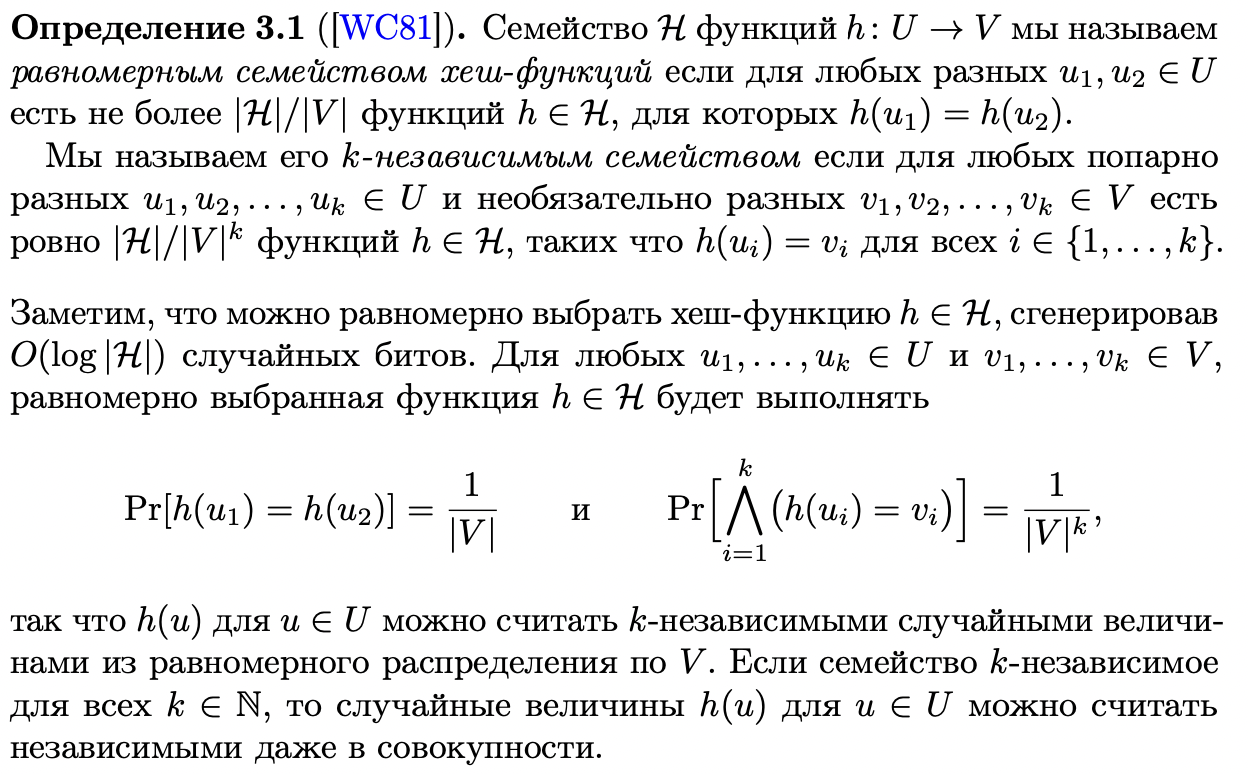

Часто хочется иметь линейный хэш. Простейший вариант линейного хэша можно представить как преобразование $Ax+b$.
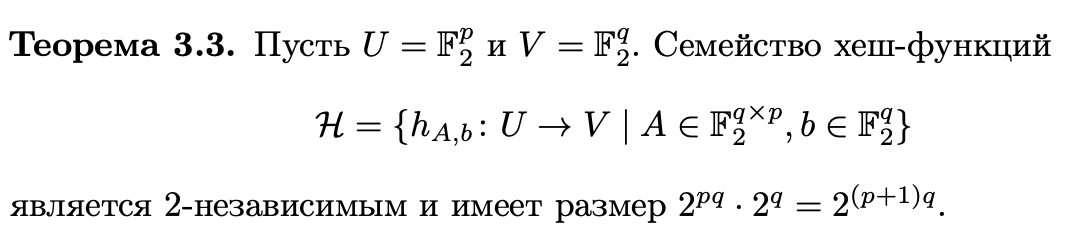

Идея доказательства в том, что если $x_1 \neq x_2$, то в некотором столбце булевый вектор разностей имеет координату 1, и она однозначно определяет весь этот столбец матрицы $A$ с вектором сдвига $b$.

Но иногда хочется $k$-независимое семейство, для этого прибегают к полиномам над конечными полями.
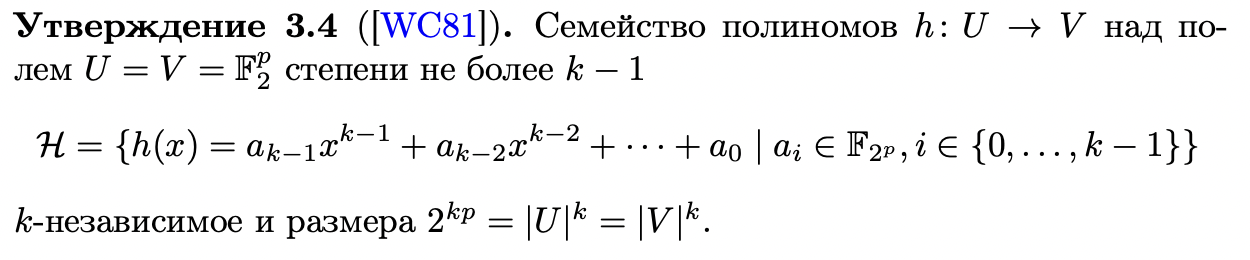

Для того, чтобы получить такое конечное поле, нам надо найти неприводимый многочлен степени $p-1$ над полем $\mathbb{F}_2$ и определить умножение на векторах в соответствии с остатками от деления представлений этих многочленов.

**На практике** можно вместо таких конечных полей брать поле $\mathbb{F}_q$ для чисел Мерсенна, или вообще для больших степеней двойки.

**Здесь будет информация про алгоритм Карпа-Рабина**

# Алгоритмы во внешней памяти


**Зачем?**

Оперативная память дорогая. К тому же при отключении питания на ней информация не сохраняется, в отличие от жестких дисков. Но на жестких дисках в среднем 7200 оборотов в минуту - это порядка 100 чтений в секунду, то есть **10ms** (RAM:  **~ 100 ns**, то есть в 100 000 раз быстрее) на запрос. В то время как скорость передачи данных порядка 100 МБайт/сек, то есть **$10^9$** бит в секунду. *Так что хочется минимизировать поиск и максимизировать объем загрузки после каждого чтения*

Чтобы скомпенсировать время поиска и чтения, мы будем считывать сразу $B$ информации (она порядка МБайта)

**B-Search**

$B$- поиск вместо бинарного через статичное $B-Tree$ за время $\mathcal{O}(\log_{B}n)$. Можно показать, что **быстрее нельзя:** у нас после каждого прочтения $B$ бит возможных $B+1$ вердикта (искомый $x$ левее всех, 1й слева, 2й и т.д.). Рисуем дерево решений и получаем ответ.

**B-Merge**

При обычном merge мы не хотели делать сразу несколько потоков, потому что там тяжело вычислять минимум. В алгоритмах внешней памяти мы себе это можнм позволить и реализовать слияние нескольких потоков с помощью приоритетной очереди.

Будем делить массив на $\frac{M}{B}$ потоков массивов с буфером размера $B$, храня приоритетную очередь.
Разбиваем на кусочки до тех пор, пока массив не поместится целиком в память. То есть в листьях дерева ветвлений порядка $M$ элементов, а разветвление происходит на $\frac{M}{B}$ детей. На каждом уровне слияние происходит за порядка $\frac{n}{B}$ чтений. Как внутри памяти это реализовано (тупым проходам каждый раз, либо же через кучу - это мы **не учитываем**). Суммарно $\mathcal{O}\left(\frac{n}{B}\log_{\frac{M}{B}}\frac{n}{M}\right)$, на практике глубина порядка 1-2, почти всё считается в памяти после первого же деления.

# Cache-oblivious model


Суть в том, что мы теперь рассматриваем кэш как внешнюю память, но при этом нам неизвестны ничьи размеры. 
Это интересно из-за того что мы не можем управлять на практике работой кэша, мы лишь делаем запросы.

Обычный merge sort работает за $\mathcal{O}(\frac{n}{B}\log \frac{n}{M})$, даже несмотря на то, что мы не знаем ни $M$, ни $B$.

Но есть нумерация **Ван Эмде Боаса**. 
* Она строится рекурсивно (и корректное построение я видел только для размеров $2^{2^k}$, с постоянным делением высоты пополам и переходам к $n\rightarrow \sqrt{n}$. 
* В таком случае, каким бы ни было $B$, в какой-то момент рассмотренная нами рекурсивная процедура нумерации станет помещаться целиком внутрь $B$ и мы будем за одно считывание проходить порядка $\log B$ высоты, при этом всё дерево порядка $\log n$. 
* Итого **cache miss'ов $\log_B n$**

# To do:

* B-Tree (for what t ... 2t-1?)
* K-Heap
* vEB Tree (for numerical)

# Дерево отрезков (Диадические интервалы)



**Interface**:
* func(L,R)
* update(L,R)

Структура часто применяется для многочисленных запросов-изменений значений на отрезках. Важно, чтобы функция для подсчета и функция изменения значений были ассоциативны и дистрибутивны. Тогда за $\mathcal{O}(\log n)$ выполняются операции. Обновление можно делать ленивым образом также за логарифм времени.

**Пример применения**

Задача на поиск максимального пересечения прямоугольника, либо площадь, покрытую максимальное количетсво раз прямоугольниками.


# Graphs

Можно хранить представление в виде 
* матрицы смежности
* списка ребер
* матрицы инциндентности
* массива списков ребер для каждой вершины (самый удобный)


**DFS**

Поиск всех компонент смежности можно реализовать с поддержкой стэка вызова вершин за время $\mathcal{O}(V+E)$. Так как всего dfs будет вызван не более $V$ раз, а внутри него каждое ребро посмотрится не более двух раз.

In [45]:
# def graphs_dfs(node, used):
#     used[node]=True
#     for (u,v) in edges(node):
#         if not used[v]:
#             dfs(v,used)
#     return

**Топологическая сортировка & Поиск циклов**

Мы упорядочиваем вершины ориентированного графа так, чтобы все не существовало ребро $\langle u_i u_j\rangle$ для $j<i$.

Алгоритм такого построения можно сделать **на базе dfs** за $\mathcal{O}(V+E)$:
* он будет красить вершины в серый цвет при заходе в dfs, а при выходе в черный
* каждый раз внутри dfs, если мы видим серую вершину, мы возвращаем **"error, found cycle!"**, если видим белую - то заходим в нее
* а если остались только черные, то мы красим текщую вершину в черный цвет и добавляем её в начала топологической сортировки

Единственный **тонкий** момент для неориентированных графов - это граф $К_2$, в нем нет циклов

Есть **линейный алгоритм сжатия компонент сильной связности** в ориентированном графе, при этом нумерующий их по топологической сортировке:
* запускаем dfs с цветами, который типа "строит топологическую нумерацию*
* разворачиваем граф
* запускаем dfs на развернутом графе, начиная с самой первой вершины в "топологической нумерации", как только вся компонента покрашена, даём ей номер.
* продолжаем со следующей вершины в "топологической сортировке*

*Скетч доказательства:*

Этот алгоритм работает, так как все компонентны сильной связности не могут быть связны. Есть хотя бы одна, в которую ничего не входит. Можно доказать, что вершина, в которой мы закончим нумерацию этой компоненты, будет самой правой в нумерации. Мы с неё и начнем. Но так как у нас в эту компоненту не входят другие, то мы не сможем из неё выйти и обойдем её целиком.

**Поиск кратчайшего пути (пути наименьшего веса)**

*Вообще критерий его существования - отсутствие циклов отрицательного веса*

* если веса неотрицательные, то можно реализовать с помощью bfs'a (через очередь и посещение потомков)
* если же веса отрицательные, то мы накладываем условие отсутствия цикла отрицательного веса и пользуемся динамическим алгоритмом **Беллмана-Форда** за $\mathcal{O}(V\cdot E)$ времени и $\mathcal{O}(E)$ памяти

In [ ]:
# def bellman_ford(distances,):
#     '''
#     calculate distances from s to v in V
    
#     distances[l][v] - массив расстояний от s до v на путях длины не более l
#     '''
#     for v in V:
#         distances[0][v]=[INF]
#     distances[0][s]=0
#     for l in range(0, |V|-1):
#         for v in V:
#             for (u,v) in E
#                 distances[l][v] = min(distances[l-1][v] + w((u,v))


# по факту нужен лишь предыдущий уровень

# def bellman_ford(distances,):
#     '''
#     calculate distances from s to v in V
    
#     distances[l][v] - массив расстояний от s до v на путях длины не более l
#     '''
#     for v in V:
#         distances[v]=[INF]
#     distances[s]=0
#     for l in range(0, |V|-1):
#         for v in V:
#             for (u,v) in E
#                 distances[v] = min(distances[v] + w((u,v))

Если веса рёбер неотрицательные, то это можно ускорить с помощью алгоритма **Дийкстры**

* будем поддерживать инвариант, что в $d[v]$ содержится длина кратчайшего пути от $s$ до $v$.
* в самом начале мы сможем заполнить лишь для ближайшего соседа $s$, назовем его $u$. Добавим эту вершинуу в множество посчитанных дистанций $S$
* далее мы уже будем смотреть для всех вершин из $S$ их ближайших соседей и расширять наше $S$
* несложно показать, что таким образом инвариант $d[v]$ будет поддерживаться. 

*Скетч доказательства*

Пусть это не так. Рассмотрим первое ошибочное заполнение таблицы $d[u]$. Если до этой вершины есть путь короче, то рассмотрим этот путь и вершину $v$ перед ней. Так как мы не взяли путь до этой вершины, его длина хотя бы такая же, как и до вершины $u$ (можно рассмотреть подпуть по $S$ до $v$). Из неотрицательности ребра заключаем, что оптимальный путь до вершины $u$ не меньше $d[u]$.


Основной причиной для оптимизации этого алгоритма является то, что $f_S[v]$ очень сильно похоже на $f_{S \,\cup \,\{u\}}[v]$, где $f_S[v]$ - длина пути от $s$ по множеству $S$ до его соседа $v \notin S$.

In [ ]:
# def dijkstra(s):
#     for v in V:
#         f[v]=INF
#     f[s]=0
#     for v in N(s):
#         f[v] = w((s,u))
#     for i in range(|V|-1):
#         u = argmin [f[u] for u in V]
#         for v in N[u]:
#             f[v] = min(f[v],f[u]+w(u,v))

Можно делать поиск argmin и decrease_key через кучу. Тогда асимптотика выполнения будет $\mathcal{O}(V \log V + E \log V)$

Если decrease_key нету, то мы можем вместо удаления просто добавить с другим расстоянием. Тогда все операции уже будут за $\log m$, но мешаться по идее нам старые ключи не будут (у них расстояние больше и мы их не вытащим).

**Займемся поиском кратчайшего пути без условия, что нет неотрицательных циклов**

Можно показать, что изменение расстояния на $V$ итерации алгоритма Беллмана-Форда - это критерий существования отрицательного цикла. Более того, хотя бы одна вершина с него прорелаксируется. 

Тогда поступим так:
* проводим $V$ итерацию и помечаем все прорелаксировавшие вершины, до них пути кратчайшего нет
* до всех достижимых из них тоже, так что запускаем поиск из помеченных

**Чтобы вывести найденный отрицательный цикл** можно поступить следующим образом:
* храним для каждой вершины $u$ $p[u]$ - ссылка на предыдущую вершину с последнего обновления $d[u]$
* на $V$ итерации алгоритма при первой релаксации начинаем путешествие по $p[u_i]$ до создания цикла; можно доказать, что он обязан быть отрицательным

**Важно помнить, что все эти алгоритмы работают внутри одной компоненты связности!**

И для поиска отрицательного цикла во всем графе можно задать $d[v]=0$ сразу для всех.

Если мы хотим сразу построить матрицу $d[u,v]$ с кратчайшими расстояниями между любыми двумя вершинами, то можно воспользоваться динамическим программированием и алгоритмом Беллмана-Форад, получим алгоритм **Флойда-Уоршелла**.

Там рекурсивно заполняется таблица $d[k,u,v]$, в которой хранится длина кратчайшего пути от $u$ до $v$ через вершины с номером не более $k$. Построение для неё займет порядка $\mathcal{O}(V^3)$, при этом память всего лишь квадратичная, так как можно просто запустить $V$ циклов с пересчетами $d[u,v]$.

In [109]:
# def floyd_warshall():
#
# initialization:
#
#     for u in U:
#         d[u,u] = 0
#     for u,v in U x U:
#        if (u,v) in E:
#             d[u,v]=w((u,v))
#        else:
#             d[u,v] = INF
# procedure:
#
#     for k in range(V):
#         for u in range(V):
#             for v in range(V):
#                 d[u,v] = min (d[u,v], d[u,k]+d[k,v])

Если там есть отрицательные циклы, то обязательно найдется вершина на нем с $d[u,u]<0$

*Скетч доказательства*

Рассмотрим отрицательный цикл и вершину на нем $u$ с наибольшим номером $n$, а также любую другую $v$. Тогда на $n$ итерации алгоритма у нас 
* $d[u,v] \leq w_{cycle}(u \rightarrow v)$
* $d[v,u]\leq w_{cycle}(v \rightarrow u)$
* $w_{cycle}(u \rightarrow v) + w_{cycle}(v \rightarrow u) = w_{cycle}<0$, а значи значит, что $d[v,v] \leq d[v,u]+d[u,v] < 0$ 

Но её несложно обработать. Для всех связных с ней пар вершин расстояние неопределено. Вычислить их можно так:


In [110]:
# find a negative cycles:
#
# for u,v,x in U x U x U:
#     if d[u,x]<INF and d[v,x]<INF and d[x,x]<0:
#         d[u,v] = -INF

Чтобы **вывести сами кратчайшие пути**, можно поступить следующим образом

* для каждого $d[u,v]$ хранить вторую вершину на текущем кратчайшем пути $p[u,v]$
* при каждом обновлении $d[u,v]$ мы меняем $p[u,v] = p[u,k]$

Это точно корректно, когда $k!=u$, а в противном случае у нас $d[k,v] > d[k,k]+d[k,v]$. А значит и $d[k,k]=d[u,u]<0$ , т.е. $u$ на отрицательном цикле 

**Очень важно помнить про переполнение. В некоторых случаях можно построить границы возможных значений и в случае их превышения переставать рассматривать эти вершины**